# Loading Data

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
# loading data
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()
# normalizing data
x_train = np.float32(X_train)/255
x_test = np.float32(X_test)/255
# one-hot label
y_train = keras.utils.to_categorical(Y_train,10)
y_test = keras.utils.to_categorical(Y_test,10)

170500096/170498071 [==============================] - 4s 0us/step


# MLP model

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
model_mlp = Sequential()
model_mlp.add(Flatten())
model_mlp.add(Dense(1000,activation='sigmoid',kernel_initializer='normal'))
model_mlp.add(Dense(500,activation='sigmoid',kernel_initializer='normal'))
model_mlp.add(Dense(10,activation='softmax',kernel_initializer='normal'))
model_mlp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history = model_mlp.fit(x_train,y_train,epochs=40,
                    validation_split=0.3,batch_size=256)

Epoch 1/40
137/137 [==============================] - 1s 9ms/step - loss: 1.9605 - accuracy: 0.2915 - val_loss: 1.8024 - val_accuracy: 0.3589
Epoch 2/40
137/137 [==============================] - 1s 7ms/step - loss: 1.7291 - accuracy: 0.3831 - val_loss: 1.6789 - val_accuracy: 0.4031
Epoch 3/40
137/137 [==============================] - 1s 7ms/step - loss: 1.6382 - accuracy: 0.4156 - val_loss: 1.6483 - val_accuracy: 0.4217
Epoch 4/40
137/137 [==============================] - 1s 7ms/step - loss: 1.5715 - accuracy: 0.4400 - val_loss: 1.5854 - val_accuracy: 0.4433
Epoch 5/40
137/137 [==============================] - 1s 6ms/step - loss: 1.5344 - accuracy: 0.4514 - val_loss: 1.5451 - val_accuracy: 0.4498
Epoch 6/40
137/137 [==============================] - 1s 6ms/step - loss: 1.4864 - accuracy: 0.4687 - val_loss: 1.5760 - val_accuracy: 0.4363
Epoch 7/40
137/137 [==============================] - 1s 6ms/step - loss: 1.4613 - accuracy: 0.4748 - val_loss: 1.5799 - val_accuracy: 0.4364
Epoch 

# Evaluate MLP model

313/313 [==============================] - 1s 2ms/step - loss: 1.5687 - accuracy: 0.5123


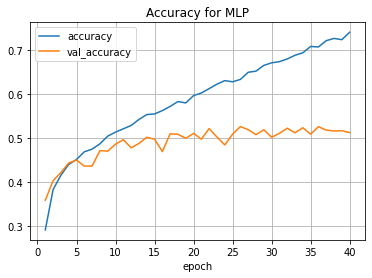

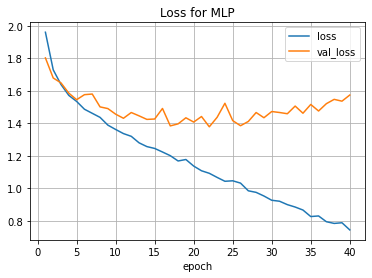

In [ ]:
import matplotlib.pyplot as plt
model_mlp.evaluate(x_test,y_test)
ep = 40;
plt.plot(np.arange(1,ep+1),history.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for MLP')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('acc_mlp.jpg',dpi=300,quality=95,bbox_inches='tight')
plt.figure()
plt.plot(np.arange(1,ep+1),history.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history.history['val_loss'],label='val_loss')
plt.title('Loss for MLP')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('loss_mlp.jpg',dpi=300,quality=95,bbox_inches='tight')

# Confusion mattrix for MLP

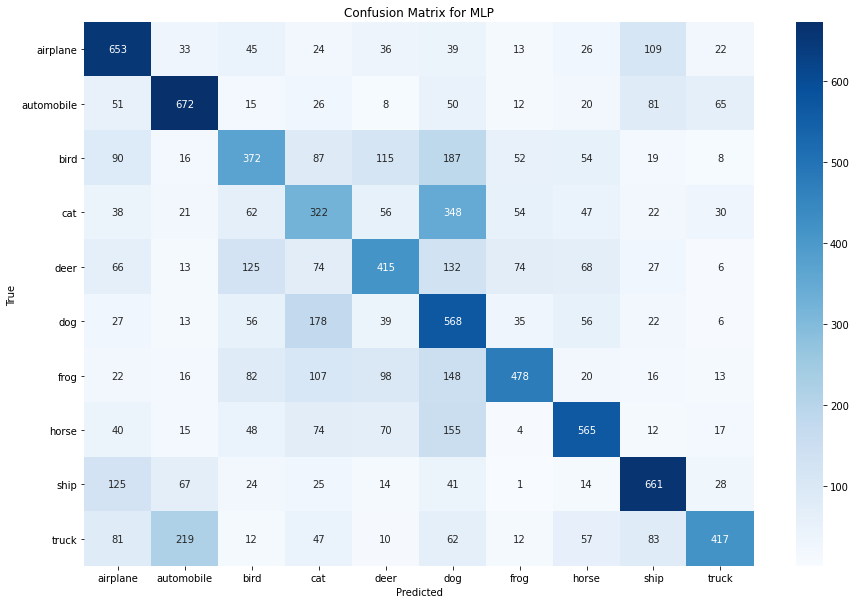

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
label = np.array(['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck'])
y_pred = np.argmax(model_mlp.predict(x_test),axis=1)
y_target = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(15,10))
sn.heatmap(cm,cmap='Blues',annot=True,fmt="d",
           xticklabels=label,yticklabels=label)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cm2.jpg',dpi=300,quality=95,bbox_inches='tight')

# CNN model (part a)

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten
from keras.models import Sequential
model_cnn = Sequential()
model_cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',
                     input_shape=(32,32,3)))
model_cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000,activation='sigmoid'))
model_cnn.add(Dense(500,activation='sigmoid'))
model_cnn.add(Dense(10,activation='softmax'))
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history2 = model_cnn.fit(x_train,y_train,epochs=40,
                        validation_split=0.3,
                        batch_size=256)

Epoch 1/40
137/137 [==============================] - 6s 43ms/step - loss: 1.6585 - accuracy: 0.3981 - val_loss: 1.3199 - val_accuracy: 0.5221
Epoch 2/40
137/137 [==============================] - 6s 42ms/step - loss: 1.2021 - accuracy: 0.5697 - val_loss: 1.2126 - val_accuracy: 0.5689
Epoch 3/40
137/137 [==============================] - 6s 42ms/step - loss: 1.0027 - accuracy: 0.6434 - val_loss: 1.0845 - val_accuracy: 0.6187
Epoch 4/40
137/137 [==============================] - 6s 42ms/step - loss: 0.8095 - accuracy: 0.7140 - val_loss: 1.0823 - val_accuracy: 0.6263
Epoch 5/40
137/137 [==============================] - 6s 42ms/step - loss: 0.6023 - accuracy: 0.7931 - val_loss: 1.0466 - val_accuracy: 0.6474
Epoch 6/40
137/137 [==============================] - 6s 42ms/step - loss: 0.3661 - accuracy: 0.8877 - val_loss: 1.0796 - val_accuracy: 0.6554
Epoch 7/40
137/137 [==============================] - 6s 42ms/step - loss: 0.1660 - accuracy: 0.9612 - val_loss: 1.1543 - val_accuracy: 0.6607

# Evaluate CNN model (part a)

313/313 [==============================] - 1s 4ms/step - loss: 1.7212 - accuracy: 0.6682


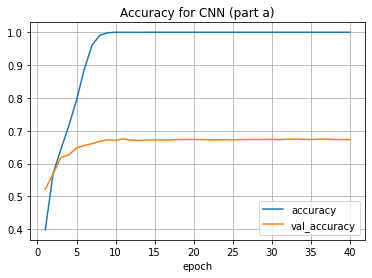

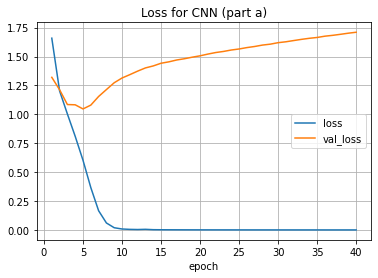

In [ ]:
import matplotlib.pyplot as plt
model_cnn.evaluate(x_test,y_test)
ep = 40;
plt.plot(np.arange(1,ep+1),history2.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history2.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for CNN (part a)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('acc_cnn_a.jpg',dpi=300,quality=95,bbox_inches='tight')
plt.figure()
plt.plot(np.arange(1,ep+1),history2.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history2.history['val_loss'],label='val_loss')
plt.title('Loss for CNN (part a)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('loss_cnn_a.jpg',dpi=300,quality=95,bbox_inches='tight')

# CNN model (part b)

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation
from keras.models import Sequential
model_cnn2 = Sequential()
model_cnn2.add(Conv2D(32,kernel_size=(3,3),
                      input_shape=(32,32,3)))
model_cnn2.add(BatchNormalization())
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPool2D(pool_size=(2, 2)))
model_cnn2.add(Conv2D(64,kernel_size=(3,3)))
model_cnn2.add(BatchNormalization())
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPool2D(pool_size=(2, 2)))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(1000,activation='sigmoid'))
model_cnn2.add(Dense(500,activation='sigmoid'))
model_cnn2.add(Dense(10,activation='softmax'))
model_cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history3 = model_cnn2.fit(x_train,y_train,epochs=40,
                        validation_split=0.3,
                        batch_size=256)

Epoch 1/40
137/137 [==============================] - 2s 15ms/step - loss: 1.4678 - accuracy: 0.4617 - val_loss: 3.8647 - val_accuracy: 0.0980
Epoch 2/40
137/137 [==============================] - 2s 13ms/step - loss: 1.0569 - accuracy: 0.6221 - val_loss: 2.7383 - val_accuracy: 0.2777
Epoch 3/40
137/137 [==============================] - 2s 13ms/step - loss: 0.8734 - accuracy: 0.6903 - val_loss: 1.9128 - val_accuracy: 0.3958
Epoch 4/40
137/137 [==============================] - 2s 13ms/step - loss: 0.7452 - accuracy: 0.7375 - val_loss: 1.1547 - val_accuracy: 0.6003
Epoch 5/40
137/137 [==============================] - 2s 13ms/step - loss: 0.6279 - accuracy: 0.7817 - val_loss: 1.3387 - val_accuracy: 0.5771
Epoch 6/40
137/137 [==============================] - 2s 13ms/step - loss: 0.5427 - accuracy: 0.8110 - val_loss: 0.9055 - val_accuracy: 0.6880
Epoch 7/40
137/137 [==============================] - 2s 13ms/step - loss: 0.4295 - accuracy: 0.8533 - val_loss: 1.2272 - val_accuracy: 0.6189

# Evaluate CNN model (part b)

313/313 [==============================] - 1s 3ms/step - loss: 1.2481 - accuracy: 0.7518


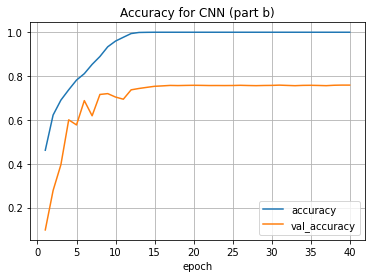

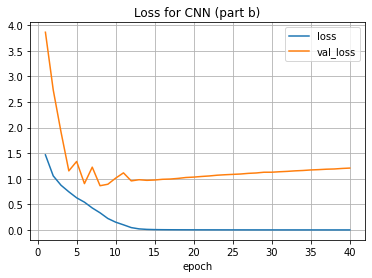

In [ ]:
import matplotlib.pyplot as plt
model_cnn2.evaluate(x_test,y_test)
ep = 40;
plt.plot(np.arange(1,ep+1),history3.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history3.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for CNN (part b)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('acc_cnn_b.jpg',dpi=300,quality=95,bbox_inches='tight')
plt.figure()
plt.plot(np.arange(1,ep+1),history3.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history3.history['val_loss'],label='val_loss')
plt.title('Loss for CNN (part b)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('loss_cnn_b.jpg',dpi=300,quality=95,bbox_inches='tight')

# CNN model (part c)

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation
from keras.models import Sequential
model_cnn3 = Sequential()
model_cnn3.add(Conv2D(32,kernel_size=(3,3),
                      input_shape=(32,32,3)))
model_cnn3.add(BatchNormalization())
model_cnn3.add(Activation('relu'))
model_cnn3.add(MaxPool2D(pool_size=(2, 2)))
model_cnn3.add(Conv2D(64,kernel_size=(3,3)))
model_cnn3.add(BatchNormalization())
model_cnn3.add(Activation('relu'))
model_cnn3.add(MaxPool2D(pool_size=(2, 2)))
model_cnn3.add(Flatten())
model_cnn3.add(Dense(1000,activation='sigmoid'))
model_cnn3.add(Dropout(0.4))
model_cnn3.add(Dense(500,activation='sigmoid'))
model_cnn3.add(Dropout(0.4))
model_cnn3.add(Dense(10,activation='softmax'))
model_cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history4 = model_cnn3.fit(x_train,y_train,epochs=40,
                        validation_split=0.3,
                        batch_size=256)

Epoch 1/40
137/137 [==============================] - 2s 15ms/step - loss: 1.6101 - accuracy: 0.4119 - val_loss: 3.5710 - val_accuracy: 0.0979
Epoch 2/40
137/137 [==============================] - 2s 13ms/step - loss: 1.1739 - accuracy: 0.5790 - val_loss: 3.2719 - val_accuracy: 0.1355
Epoch 3/40
137/137 [==============================] - 2s 13ms/step - loss: 1.0083 - accuracy: 0.6413 - val_loss: 1.9853 - val_accuracy: 0.3526
Epoch 4/40
137/137 [==============================] - 2s 13ms/step - loss: 0.9204 - accuracy: 0.6730 - val_loss: 1.3092 - val_accuracy: 0.5393
Epoch 5/40
137/137 [==============================] - 2s 13ms/step - loss: 0.8393 - accuracy: 0.7045 - val_loss: 0.9706 - val_accuracy: 0.6574
Epoch 6/40
137/137 [==============================] - 2s 13ms/step - loss: 0.7722 - accuracy: 0.7271 - val_loss: 1.0412 - val_accuracy: 0.6431
Epoch 7/40
137/137 [==============================] - 2s 13ms/step - loss: 0.7164 - accuracy: 0.7498 - val_loss: 0.8171 - val_accuracy: 0.7147

# Evaluate CNN model (part c)

313/313 [==============================] - 1s 3ms/step - loss: 1.2227 - accuracy: 0.7353


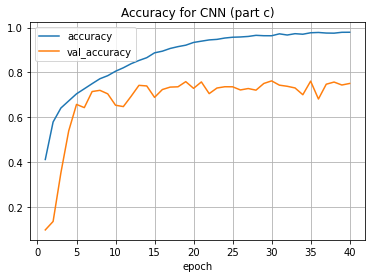

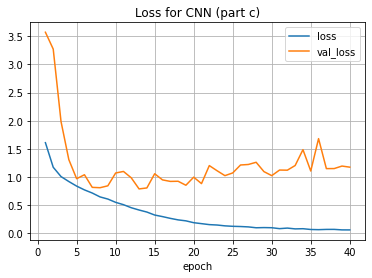

In [ ]:
import matplotlib.pyplot as plt
model_cnn3.evaluate(x_test,y_test)
ep = 40;
plt.plot(np.arange(1,ep+1),history4.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history4.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for CNN (part c)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('acc_cnn_c.jpg',dpi=300,quality=95,bbox_inches='tight')
plt.figure()
plt.plot(np.arange(1,ep+1),history4.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history4.history['val_loss'],label='val_loss')
plt.title('Loss for CNN (part c)')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('loss_cnn_c.jpg',dpi=300,quality=95,bbox_inches='tight')

# Confusion mattrix for CNN

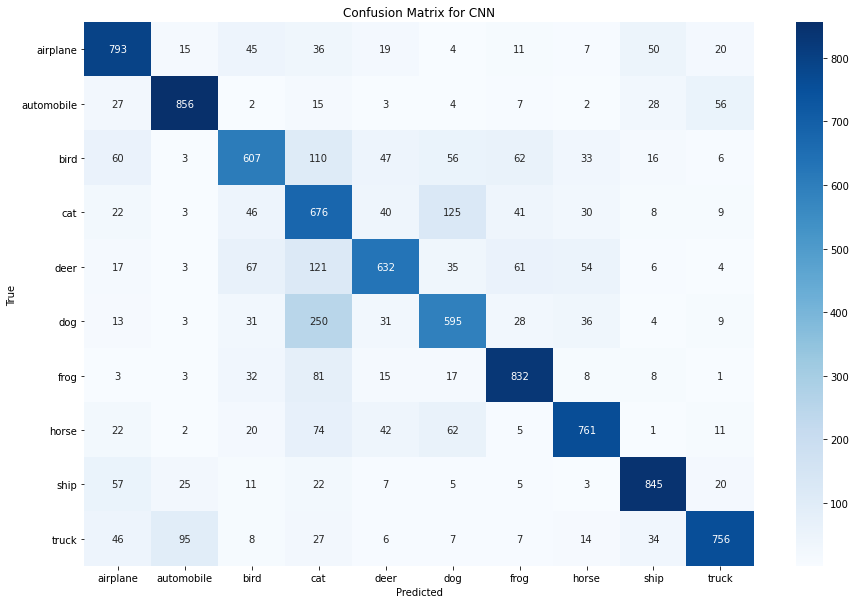

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
label = np.array(['airplane','automobile','bird','cat','deer',
           'dog','frog','horse','ship','truck'])
y_pred = np.argmax(model_cnn3.predict(x_test),axis=1)
y_target = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(15,10))
sn.heatmap(cm,cmap='Blues',annot=True,fmt="d",
           xticklabels=label,yticklabels=label)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cm.jpg',dpi=300,quality=95,bbox_inches='tight')

# Early stopping

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='accuracy', patience=3,
                   restore_best_weights=True,min_delta=0.01)
model_cnn4 = Sequential()
model_cnn4.add(Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3)))
model_cnn4.add(BatchNormalization())
model_cnn4.add(Activation('relu'))
model_cnn4.add(MaxPool2D(pool_size=(2, 2)))
model_cnn4.add(Conv2D(64,kernel_size=(3,3)))
model_cnn4.add(BatchNormalization())
model_cnn4.add(Activation('relu'))
model_cnn4.add(MaxPool2D(pool_size=(2, 2)))
model_cnn4.add(Flatten())
model_cnn4.add(Dense(1000,activation='sigmoid'))
model_cnn4.add(Dense(500,activation='sigmoid'))
model_cnn4.add(Dense(10,activation='softmax'))
model_cnn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
history5 = model_cnn4.fit(x_train,y_train,epochs=40,
                        validation_split=0.3,
                        batch_size=256,
                        callbacks=[cb])

Epoch 1/40
137/137 [==============================] - 2s 15ms/step - loss: 1.4691 - accuracy: 0.4649 - val_loss: 3.5210 - val_accuracy: 0.1050
Epoch 2/40
137/137 [==============================] - 2s 13ms/step - loss: 1.0489 - accuracy: 0.6275 - val_loss: 2.7560 - val_accuracy: 0.2518
Epoch 3/40
137/137 [==============================] - 2s 13ms/step - loss: 0.8725 - accuracy: 0.6942 - val_loss: 1.9424 - val_accuracy: 0.3910
Epoch 4/40
137/137 [==============================] - 2s 13ms/step - loss: 0.7498 - accuracy: 0.7384 - val_loss: 1.0173 - val_accuracy: 0.6421
Epoch 5/40
137/137 [==============================] - 2s 13ms/step - loss: 0.6458 - accuracy: 0.7751 - val_loss: 1.1534 - val_accuracy: 0.6233
Epoch 6/40
137/137 [==============================] - 2s 13ms/step - loss: 0.5309 - accuracy: 0.8178 - val_loss: 1.0759 - val_accuracy: 0.6325
Epoch 7/40
137/137 [==============================] - 2s 13ms/step - loss: 0.4367 - accuracy: 0.8536 - val_loss: 1.0492 - val_accuracy: 0.6574